## Walmart Capstone Project

### Problem Statement 1:
- A retail store that has multiple outlets across the country are facing issues in managing the
 inventory - to match the demand with respect to supply

#### Importing Libraries

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [157]:
df = pd.read_csv('Walmart DataSet.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [158]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [160]:
df.shape

(6435, 8)

In [161]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [162]:
df.duplicated().sum()

0

In [163]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [164]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [165]:
# Extract Year, Month, and Week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [166]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3


## Exploratory Data Analysis (EDA)

###  Weekly Sales vs. Unemployment Rate

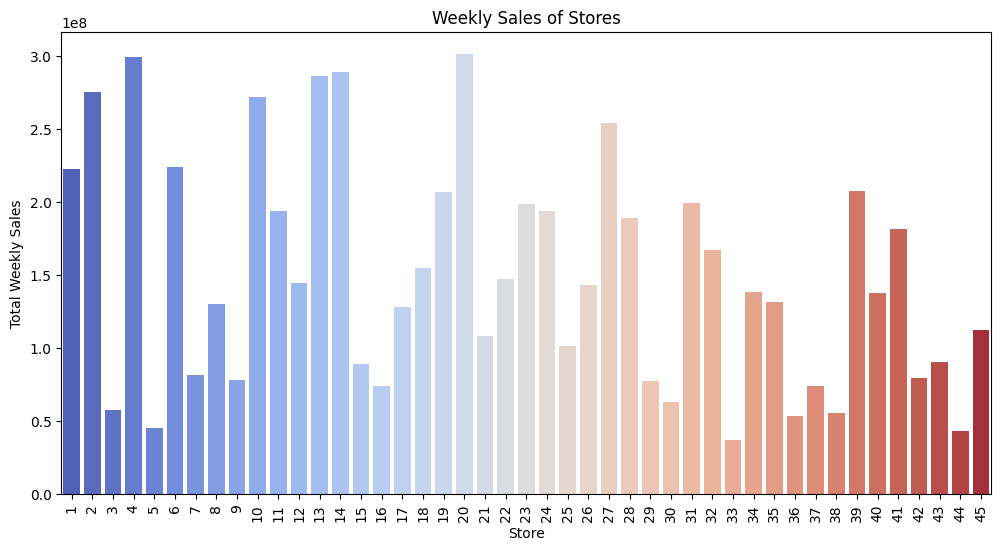

In [167]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
store_sales = store_sales.sort_values(by='Weekly_Sales', ascending=False)

# Column chart for weekly sales by store
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=store_sales, palette='coolwarm')
plt.title('Weekly Sales of Stores')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=90)
plt.show()

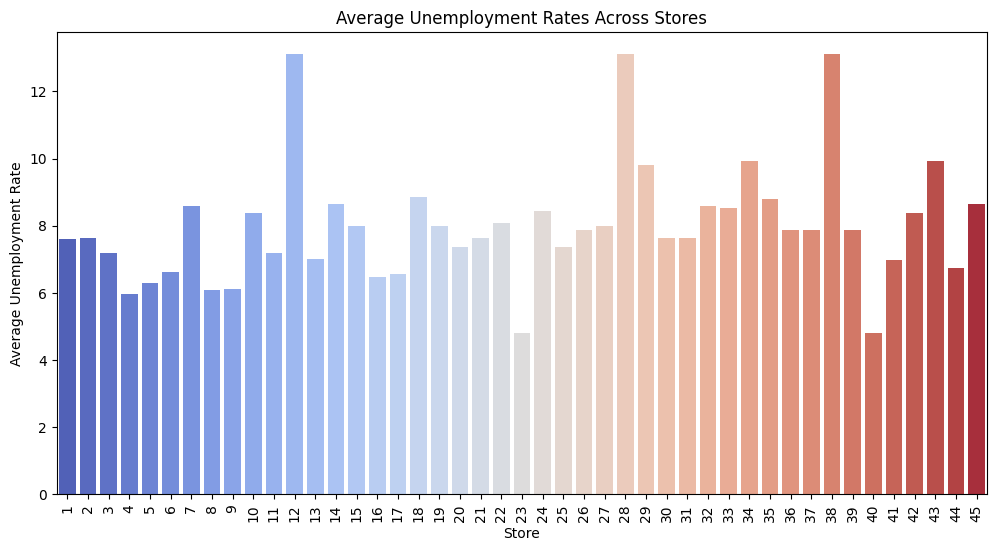

In [168]:
store_unemployment = df.groupby('Store')['Unemployment'].mean().reset_index()
store_unemployment = store_unemployment.sort_values(by='Unemployment', ascending=False)

# Column chart for average unemployment rate by store
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Unemployment', data=store_unemployment, palette='coolwarm')
plt.title('Average Unemployment Rates Across Stores')
plt.xlabel('Store')
plt.ylabel('Average Unemployment Rate')
plt.xticks(rotation=90)
plt.show()

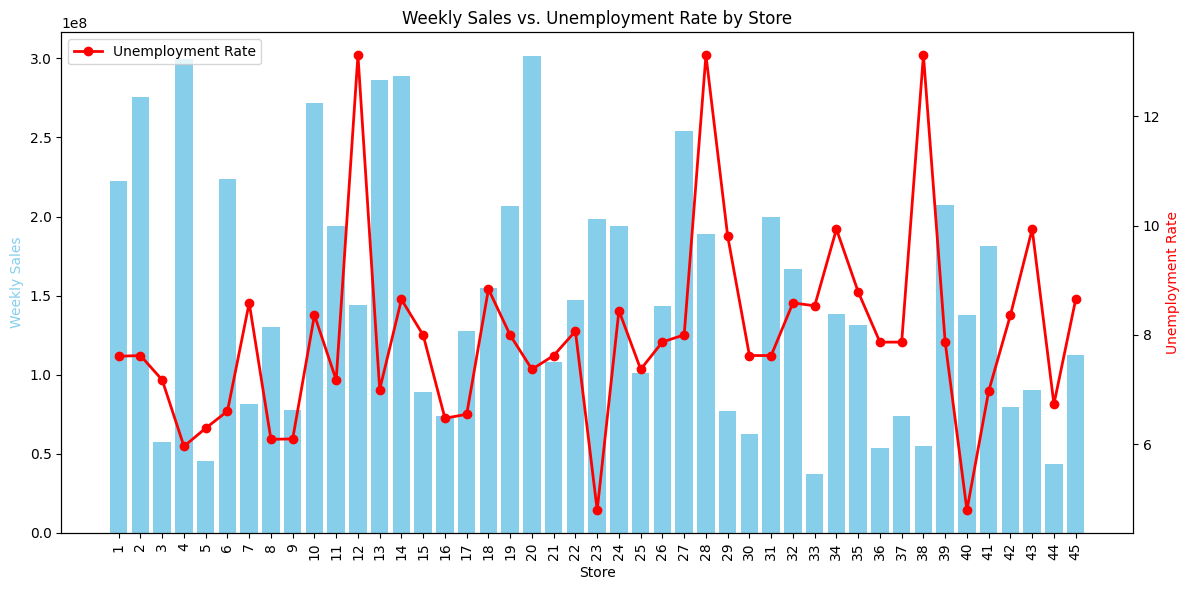

In [169]:
# Group by Store and calculate the total weekly sales and average unemployment rate
store_sales_unemployment = df.groupby('Store').agg({'Weekly_Sales': 'sum', 'Unemployment': 'mean'}).reset_index()

# creating subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting column charts
ax1.bar(store_sales_unemployment['Store'], store_sales_unemployment['Weekly_Sales'], color='skyblue', label='Weekly Sales')
ax2 = ax1.twinx()

# Ploting the line
ax2.plot(store_sales_unemployment['Store'], store_sales_unemployment['Unemployment'], color='red', marker='o', label='Unemployment Rate', linestyle='-', linewidth=2)

ax1.set_xlabel('Store')
ax1.set_ylabel('Weekly Sales', color='skyblue')
ax2.set_ylabel('Unemployment Rate', color='red')
ax1.set_title('Weekly Sales vs. Unemployment Rate by Store')


ax1.set_xticks(store_sales_unemployment['Store'])
ax1.set_xticklabels(store_sales_unemployment['Store'], rotation=90)

# Show the plot
plt.tight_layout()  
plt.legend(loc='upper left')
plt.show()

- Most of the time, the unemployment rate is stable accross the store
- store 38 suffered high unemployment maybe because of the low sales in weeks
- store 23 and 40 have very low unemployment rate, but with mediocore sales
- surprisingly, store 12 and 28 also have high unemployment even with good weekly sales

### b. Seasonal Trend in Weekly Sales

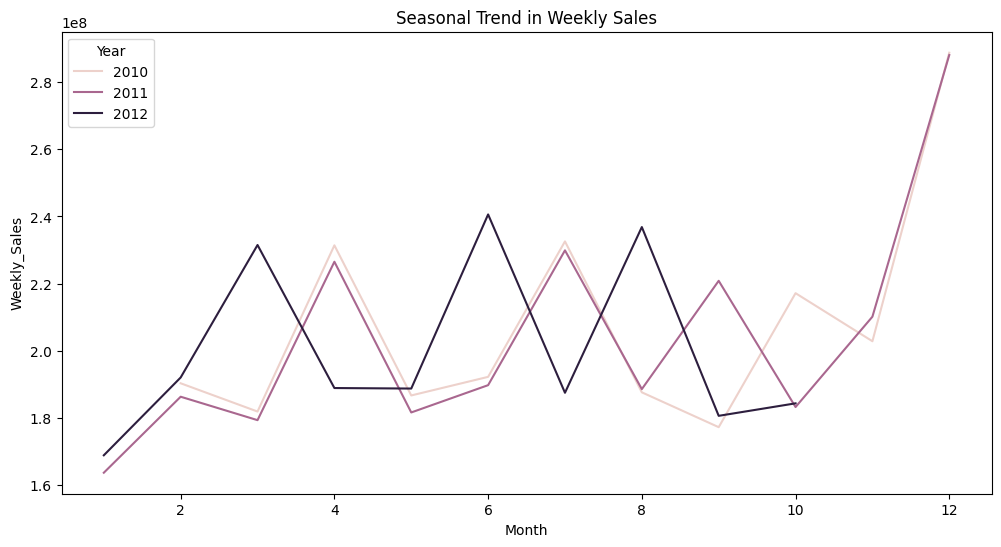

In [170]:
# Plot trends by year and month
monthly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Weekly_Sales', hue='Year')
plt.title("Seasonal Trend in Weekly Sales")
plt.show()


 - Weekly sales have peaked in december
 - The reason for that maybe more people comimg to shop because of the christmas and new year. Year ending sales may also be the reason

### c. Effect of Temperature on Weekly Sales

Correlation between Temperature and Weekly Sales: -0.06381001317946958


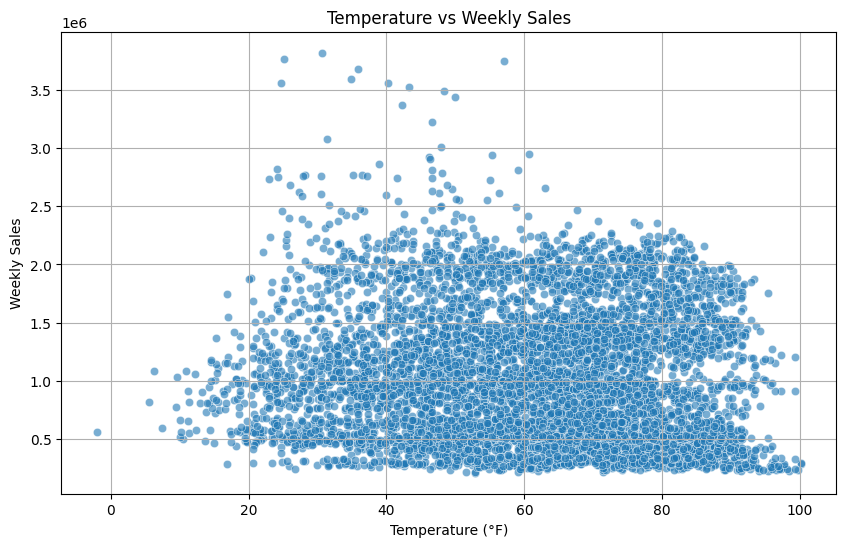

In [171]:
# Correlation calculation
temp_corr = df['Weekly_Sales'].corr(df['Temperature'])
print(f"Correlation between Temperature and Weekly Sales: {temp_corr}")

# Scatter plot for temperature and weekly sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df, alpha=0.6)
plt.title('Temperature vs Weekly Sales')
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Sales')
plt.grid()
plt.show()


- A correlation of -0.0638 indicates a very weak negative relationship, suggesting that temperature has very little impact on weekly sales. This could be due to other factors influencing sales more strongly than temperature.

### CPI vs. Weekly Sales

Correlation between CPI and Weekly Sales: -0.07263416204017625


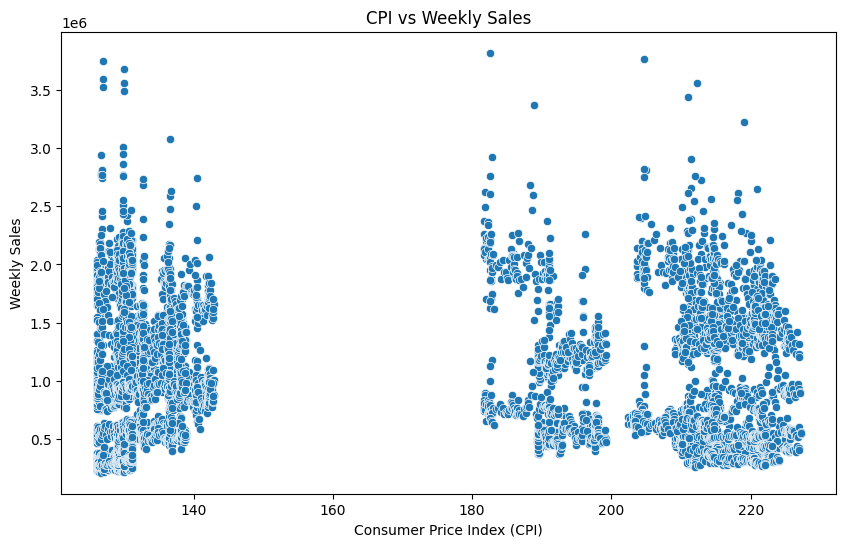

In [172]:
# Calculate the correlation between CPI and Weekly Sales
cpi_sales_corr = df['CPI'].corr(df['Weekly_Sales'])
print(f'Correlation between CPI and Weekly Sales: {cpi_sales_corr}')

# Scatter plot of CPI vs Weekly Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['CPI'], y=df['Weekly_Sales'])
plt.title('CPI vs Weekly Sales')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')
plt.show()

- CPI have very little direct impact on the weekly sales in this dataset
- There is no data with the cpi from 140 to 180


### e. Top and worse Performing Stores

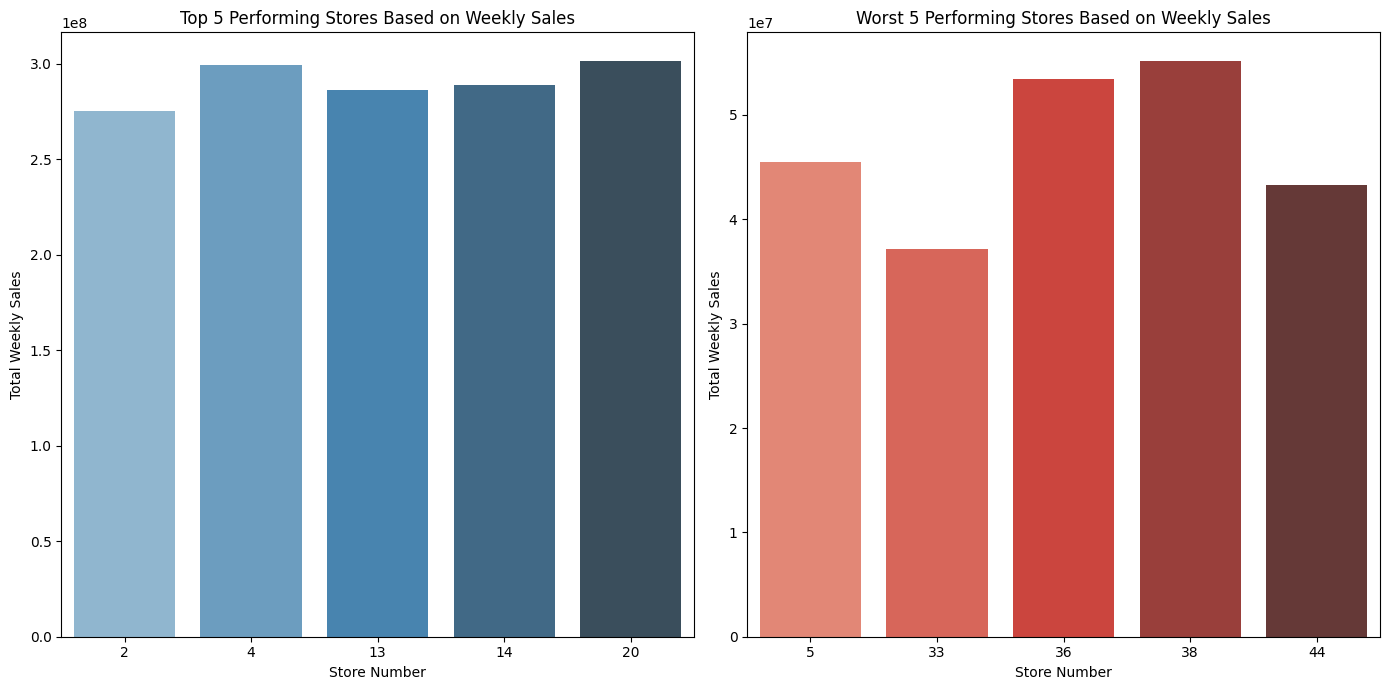

In [173]:
# total sales per store
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Sort stores by total sales in descending order to identify top-performing and worst-performing
store_sales_sorted = store_sales.sort_values(by='Weekly_Sales', ascending=False)

top_stores = store_sales_sorted.head(5)
worst_stores = store_sales_sorted.tail(5)

plt.figure(figsize=(14, 7))

# Plotting top-performing stores
plt.subplot(1, 2, 1)
sns.barplot(x='Store', y='Weekly_Sales', data=top_stores, palette='Blues_d')
plt.title('Top 5 Performing Stores Based on Weekly Sales')
plt.xlabel('Store Number')
plt.ylabel('Total Weekly Sales')

# Plotting worst-performing stores
plt.subplot(1, 2, 2)
sns.barplot(x='Store', y='Weekly_Sales', data=worst_stores, palette='Reds_d')
plt.title('Worst 5 Performing Stores Based on Weekly Sales')
plt.xlabel('Store Number')
plt.ylabel('Total Weekly Sales')

plt.tight_layout()
plt.show()

In [174]:
highest_performing_store = store_sales_sorted.iloc[0]

lowest_performing_store = store_sales_sorted.iloc[-1]

difference_in_sales = highest_performing_store['Weekly_Sales'] - lowest_performing_store['Weekly_Sales']

percentage_difference = (difference_in_sales / highest_performing_store['Weekly_Sales']) * 100

# results
print(f"Highest Performing Store (Store {highest_performing_store['Store']}): {highest_performing_store['Weekly_Sales']}")
print(f"Lowest Performing Store (Store {lowest_performing_store['Store']}): {lowest_performing_store['Weekly_Sales']}")
print(f"Absolute Difference in Sales: {difference_in_sales:.2f}")
print(f"Percentage Difference: {percentage_difference:.2f}%")

Highest Performing Store (Store 20.0): 301397792.46
Lowest Performing Store (Store 33.0): 37160221.96
Absolute Difference in Sales: 264237570.50
Percentage Difference: 87.67%


- stores 2,4,13,14,20 are the top perdorming stores
- Stores 5,33,36,38 and 44 are the worsr performing stores
- There is a 87.67% difference between top and worse performing stores

### Forecasting the sales for another 12 weeks

In [175]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [176]:
# Feature extraction (month and year are already present in the data)
df['Week'] = df['Date'].dt.week  # You might want to use 'Week' for weekly data
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Filter data for a specific store (example: Store 1)
store_data = df[df['Store'] == 1]

# Feature selection (using relevant columns for forecasting)
X = store_data[['Year', 'Month', 'Week', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = store_data['Weekly_Sales']

In [177]:
# Filter data for a specific store (example: Store 1)
store_data = df[df['Store'] == 1]

# Feature selection (using relevant columns for forecasting)
X = store_data[['Year', 'Month', 'Week', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = store_data['Weekly_Sales']

# Train-test split (use past data to train, and predict future)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions for the test set (optional to check model performance)
y_pred = rf_model.predict(X_test)

In [178]:
# Forecast for the next 12 weeks (we'll assume the last known data for future prediction)
last_week_data = store_data.iloc[-1][['Year', 'Month', 'Week', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].values.reshape(1, -1)

# List to store the predicted sales for the next 12 weeks
future_weeks_sales = []

# Forecast for the next 12 weeks
for i in range(12):  # Forecast the next 12 weeks
    # Update the week, month, and year for each forecast
    last_week_data[0][2] = (last_week_data[0][2] % 52) + 1  # Update week number
    last_week_data[0][1] = (last_week_data[0][1] % 12) + 1  # Update month
    last_week_data[0][0] = last_week_data[0][0] + (1 if last_week_data[0][1] == 1 else 0)  # Update year if needed
    predicted_sales = rf_model.predict(last_week_data)  # Predict sales
    future_weeks_sales.append(predicted_sales[0])

# Create a DataFrame for the forecasted sales
forecast_df = pd.DataFrame({
    'Week': range(1, 13),
    'Forecasted_Sales': future_weeks_sales
})

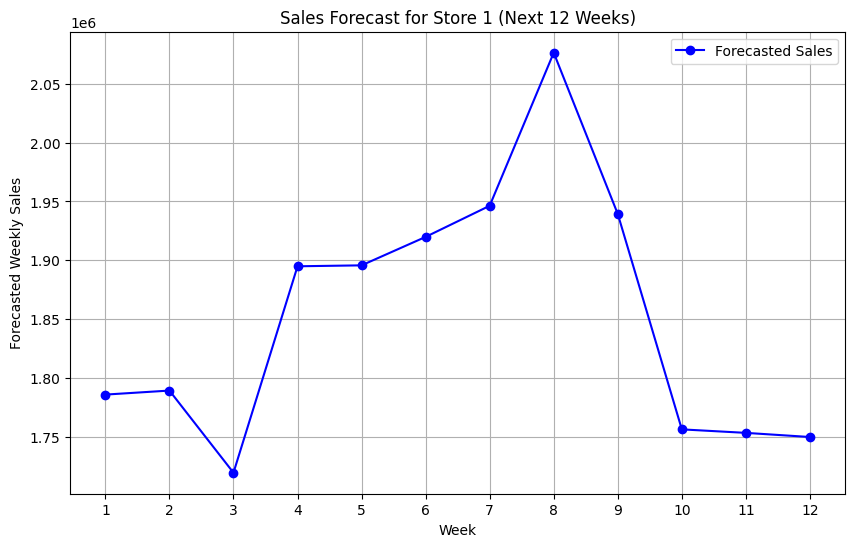

In [179]:
# Plot the forecasted sales for the next 12 weeks
plt.figure(figsize=(10, 6))
plt.plot(forecast_df['Week'], forecast_df['Forecasted_Sales'], marker='o', color='b', label='Forecasted Sales')
plt.title(f'Sales Forecast for Store 1 (Next 12 Weeks)')
plt.xlabel('Week')
plt.ylabel('Forecasted Weekly Sales')
plt.grid(True)
plt.xticks(forecast_df['Week'])
plt.legend()
plt.show()

- Seems accurate becasue of the jump in december month. The rest of the store forecast recoded as subplots in next python file

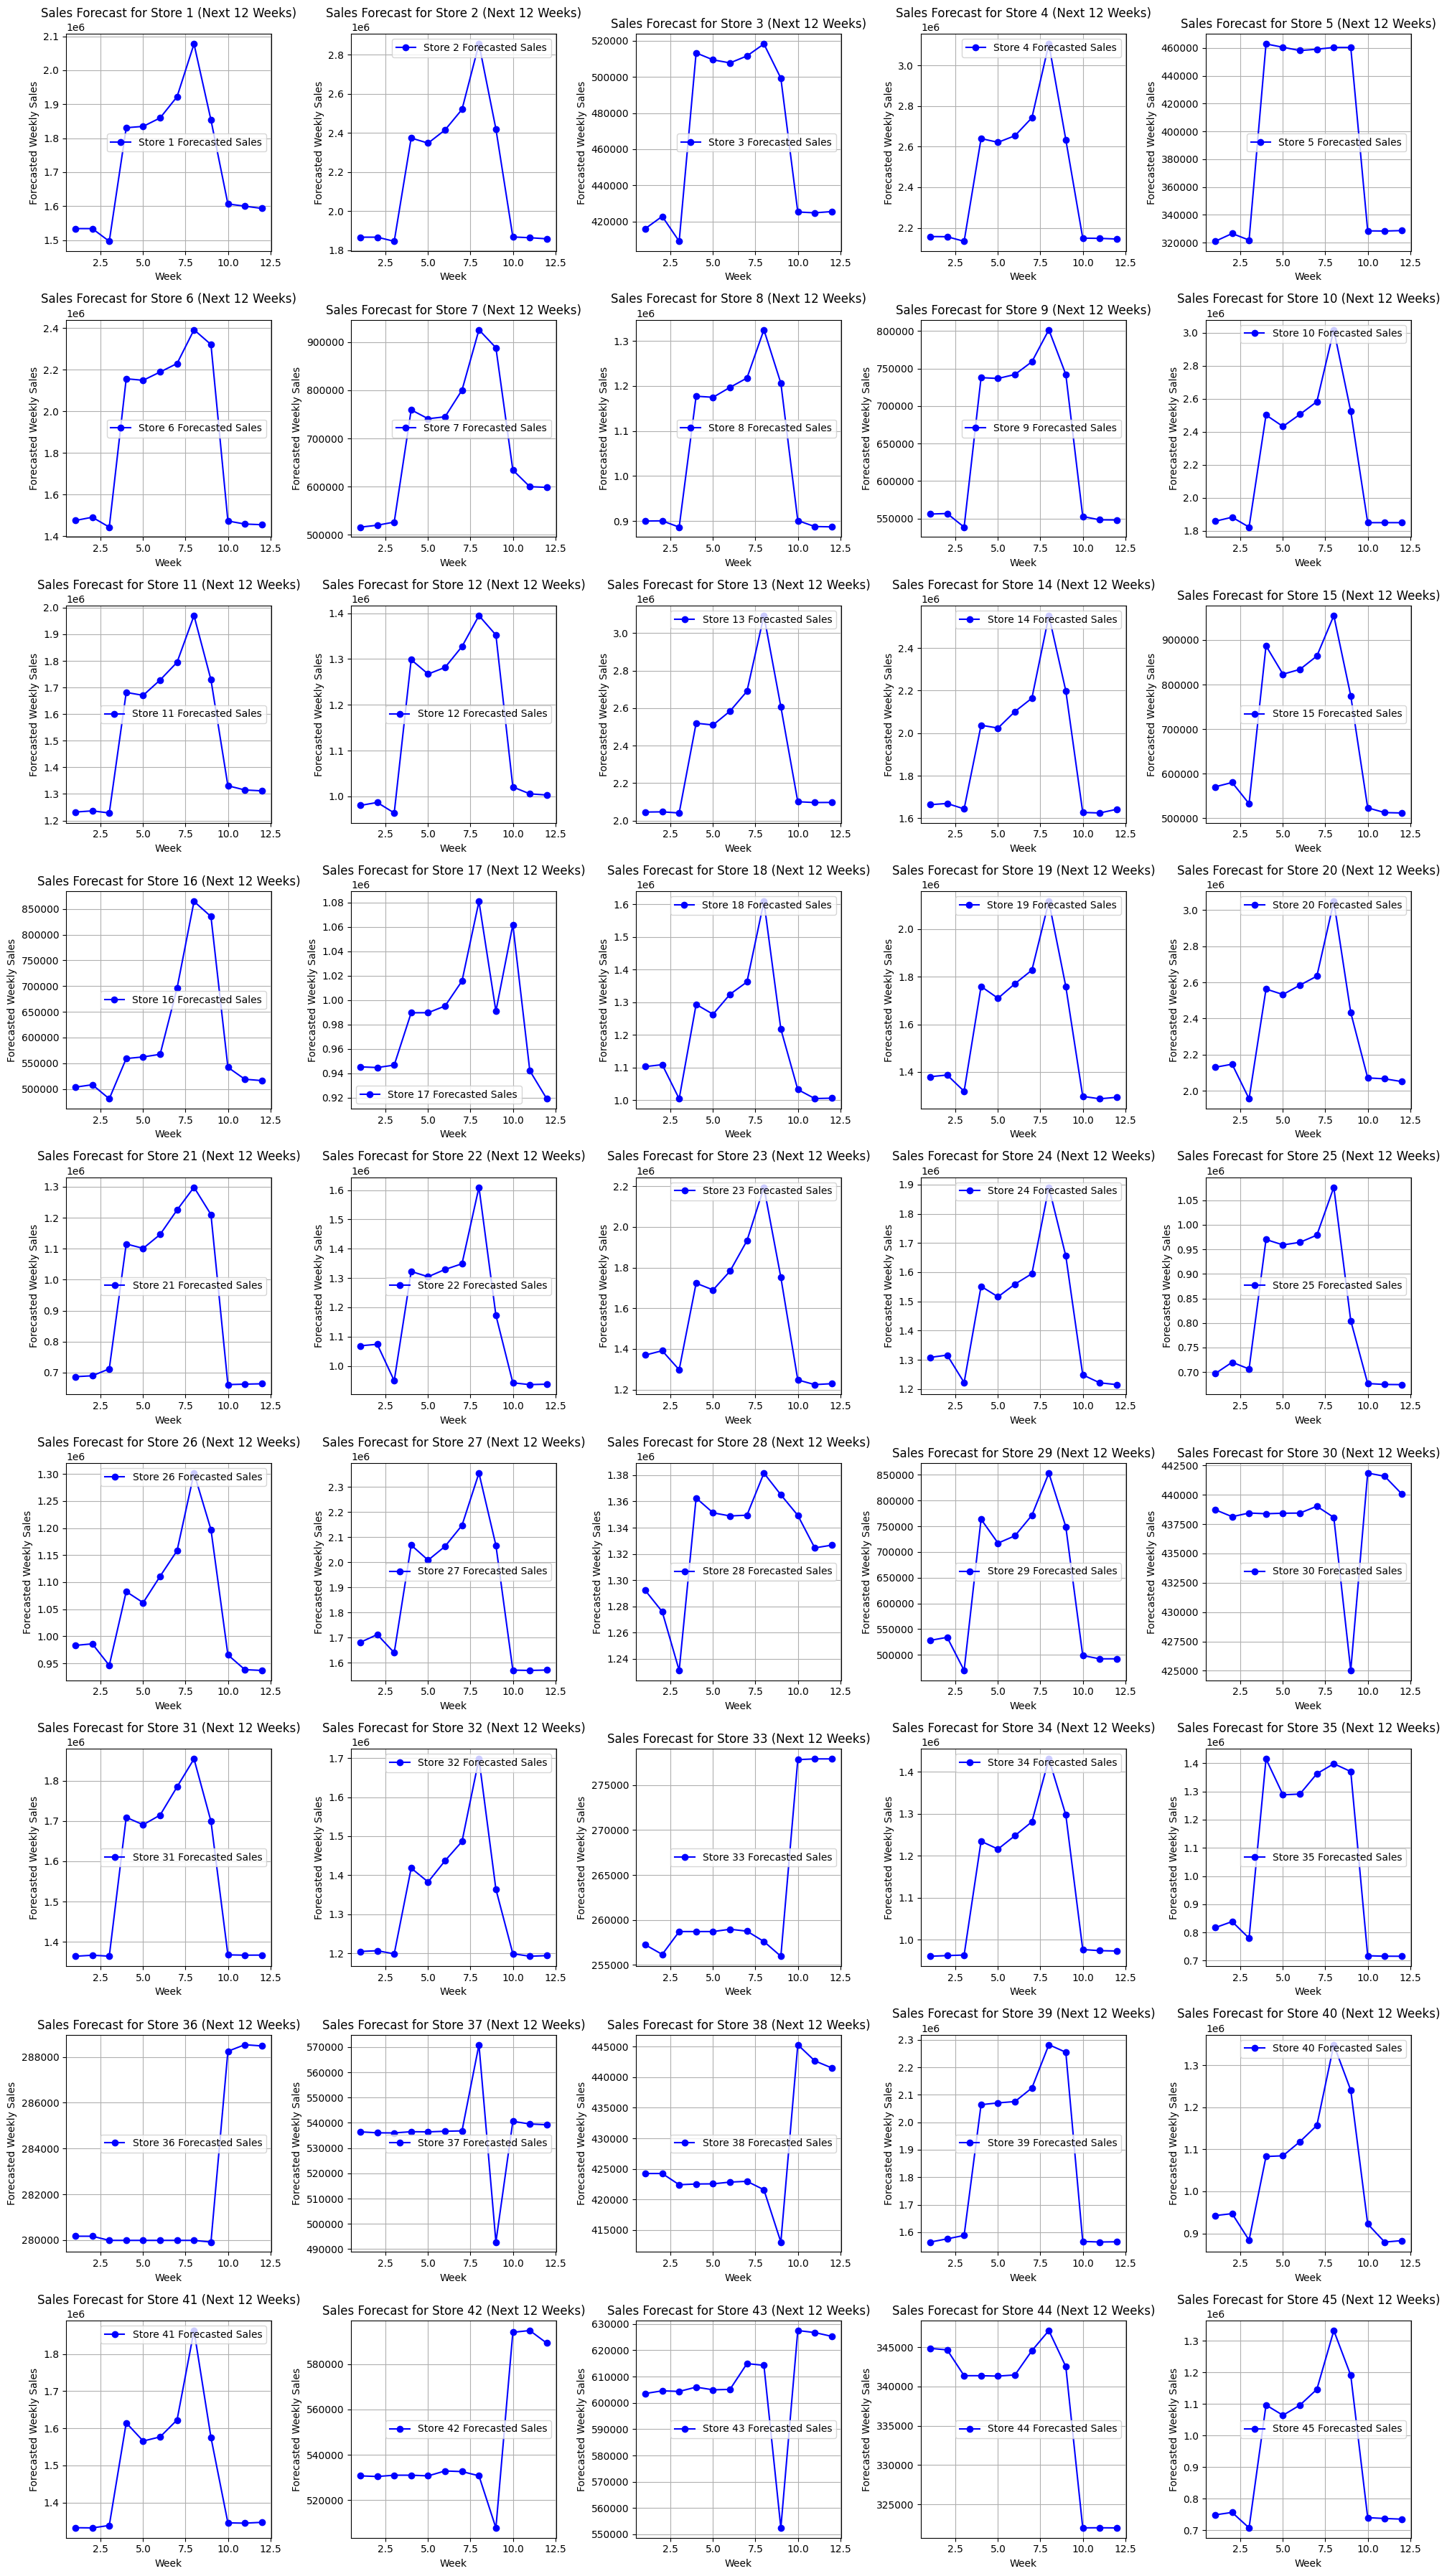

In [180]:
unique_stores = df['Store'].unique()

# I want to create subplots with 9 rows and 5 columns
nrows = 9
ncols = 5
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 4 * nrows))

# Flatten axes 
axes = axes.flatten()

for i, store_id in enumerate(unique_stores):
    store_data = df[df['Store'] == store_id]
    
    # Feature selection 
    X = store_data[['Year', 'Month', 'Week', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
    y = store_data['Weekly_Sales']

    # Train-test split 
    X_train = X
    y_train = y

    # Fit the Random Forest model
    rf_model.fit(X_train, y_train)

    # Get the last row of data to start forecasting
    last_week_data = store_data.iloc[-1][['Year', 'Month', 'Week', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].values.reshape(1, -1)

  
    future_weeks_sales = []

    # Forecast for the next 12 weeks
    for j in range(12):  # Forecast the next 12 weeks
        # Update the week, month, and year for each forecast
        last_week_data[0][2] = (last_week_data[0][2] % 52) + 1  # Update week number
        last_week_data[0][1] = (last_week_data[0][1] % 12) + 1  # Update month
        last_week_data[0][0] = last_week_data[0][0] + (1 if last_week_data[0][1] == 1 else 0)  # Update year if needed
        predicted_sales = rf_model.predict(last_week_data)  # Predict sales
        future_weeks_sales.append(predicted_sales[0])

    # Creating a DataFrame for the forecasted sales
    forecast_df = pd.DataFrame({
        'Week': range(1, 13),
        'Forecasted_Sales': future_weeks_sales
    })

    # Ploting the forecast 
    ax = axes[i]
    ax.plot(forecast_df['Week'], forecast_df['Forecasted_Sales'], marker='o', color='b', label=f'Store {store_id} Forecasted Sales')
    ax.set_title(f'Sales Forecast for Store {store_id} (Next 12 Weeks)')
    ax.set_xlabel('Week')
    ax.set_ylabel('Forecasted Weekly Sales')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()